<a href="https://colab.research.google.com/github/christadel27/belajar_github_wave9/blob/main/Linear_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning objectives:
After doing this exercise, you'll know how to do the following:

Run Colabs.
Tune the following hyperparameters:
learning rate
number of epochs
batch size
Interpret different kinds of loss curves.

In [7]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [1]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [5]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).

In [3]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/10
1/1 [==============================] - 0s 478ms/step - loss: 328.2755 - root_mean_squared_error: 18.1184
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 318.8953 - root_mean_squared_error: 17.8576
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 312.2217 - root_mean_squared_error: 17.6698
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 306.7114 - root_mean_squared_error: 17.5132
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 301.8763 - root_mean_squared_error: 17.3746
Epoch 6/10
1/1 [==============================] - 0s 25ms/step - loss: 297.4908 - root_mean_squared_error: 17.2479
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 293.4291 - root_mean_squared_error: 17.1298
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 289.6134 - root_mean_squared_error: 17.0180
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 285.9913

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


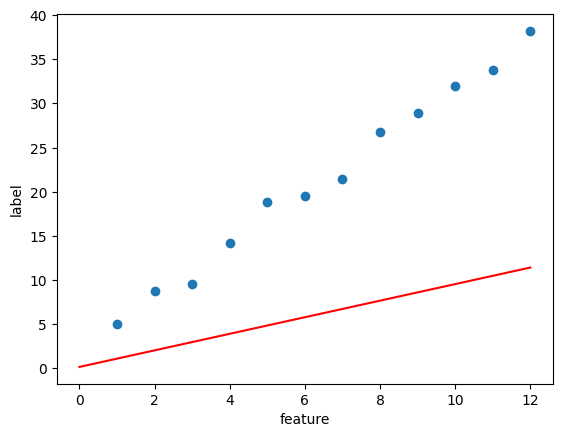

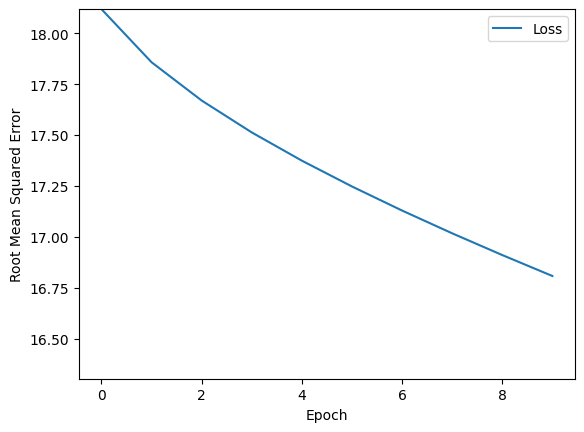

In [8]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/450
1/1 [==============================] - 0s 483ms/step - loss: 566.5756 - root_mean_squared_error: 23.8028
Epoch 2/450
1/1 [==============================] - 0s 41ms/step - loss: 554.2253 - root_mean_squared_error: 23.5420
Epoch 3/450
1/1 [==============================] - 0s 21ms/step - loss: 545.3972 - root_mean_squared_error: 23.3537
Epoch 4/450
1/1 [==============================] - 0s 18ms/step - loss: 538.0829 - root_mean_squared_error: 23.1966
Epoch 5/450
1/1 [==============================] - 0s 17ms/step - loss: 531.6470 - root_mean_squared_error: 23.0575
Epoch 6/450
1/1 [==============================] - 0s 59ms/step - loss: 525.7945 - root_mean_squared_error: 22.9302
Epoch 7/450
1/1 [==============================] - 0s 23ms/step - loss: 520.3618 - root_mean_squared_error: 22.8114
Epoch 8/450
1/1 [==============================] - 0s 25ms/step - loss: 515.2469 - root_mean_squared_error: 22.6991
Epoch 9/450
1/1 [==============================] - 0s 24ms/step - loss:

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


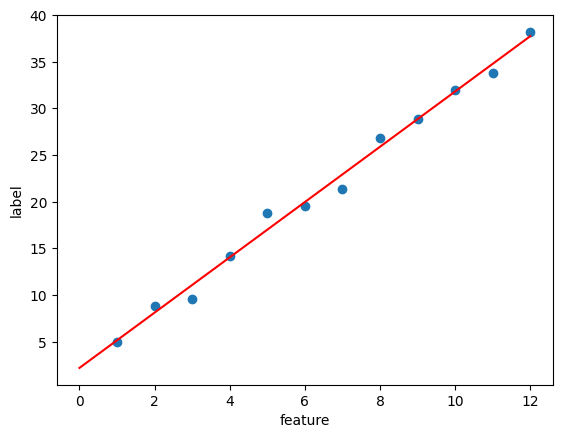

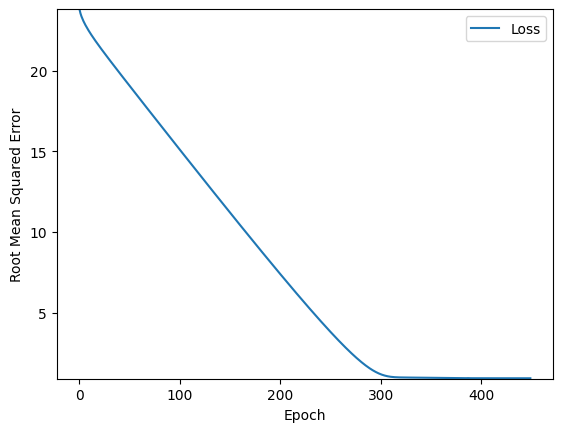

In [9]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 1s 684ms/step - loss: 197.8997 - root_mean_squared_error: 14.0677
Epoch 2/500
1/1 [==============================] - 0s 31ms/step - loss: 6743577.5000 - root_mean_squared_error: 2596.8398
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 196.9398 - root_mean_squared_error: 14.0335
Epoch 4/500
1/1 [==============================] - 0s 22ms/step - loss: 1.6232 - root_mean_squared_error: 1.2741
Epoch 5/500
1/1 [==============================] - 0s 35ms/step - loss: 0.9301 - root_mean_squared_error: 0.9644
Epoch 6/500
1/1 [==============================] - 0s 27ms/step - loss: 0.9180 - root_mean_squared_error: 0.9581
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 0.9150 - root_mean_squared_error: 0.9566
Epoch 8/500
1/1 [==============================] - 0s 35ms/step - loss: 0.9123 - root_mean_squared_error: 0.9551
Epoch 9/500
1/1 [==============================] - 0s 14ms/step - loss: 0.9097 -

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


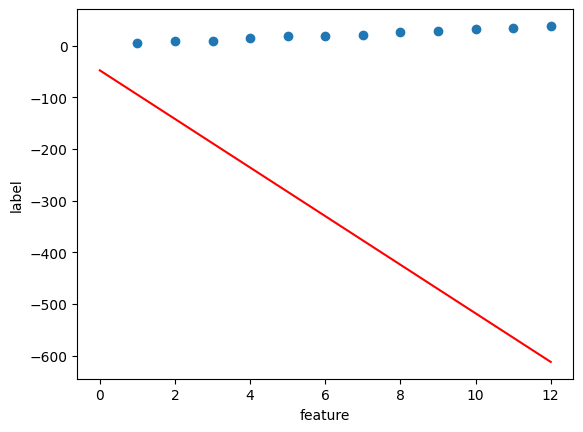

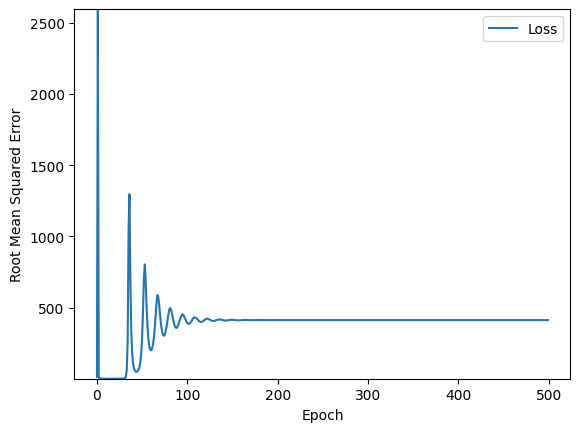

In [10]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100
epochs=500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible:

*  learning_rate
*  epochs

Epoch 1/70
1/1 [==============================] - 0s 469ms/step - loss: 1276.9103 - root_mean_squared_error: 35.7339
Epoch 2/70
1/1 [==============================] - 0s 21ms/step - loss: 1029.2338 - root_mean_squared_error: 32.0817
Epoch 3/70
1/1 [==============================] - 0s 28ms/step - loss: 874.5012 - root_mean_squared_error: 29.5720
Epoch 4/70
1/1 [==============================] - 0s 23ms/step - loss: 758.7061 - root_mean_squared_error: 27.5446
Epoch 5/70
1/1 [==============================] - 0s 27ms/step - loss: 665.5106 - root_mean_squared_error: 25.7975
Epoch 6/70
1/1 [==============================] - 0s 43ms/step - loss: 587.5049 - root_mean_squared_error: 24.2385
Epoch 7/70
1/1 [==============================] - 0s 50ms/step - loss: 520.6161 - root_mean_squared_error: 22.8170
Epoch 8/70
1/1 [==============================] - 0s 19ms/step - loss: 462.3317 - root_mean_squared_error: 21.5019
Epoch 9/70
1/1 [==============================] - 0s 20ms/step - loss: 410.97

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


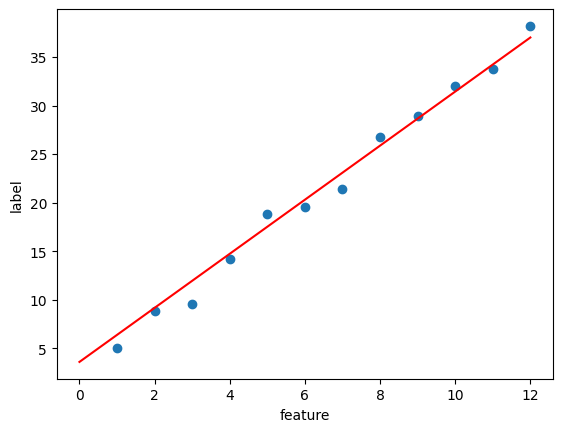

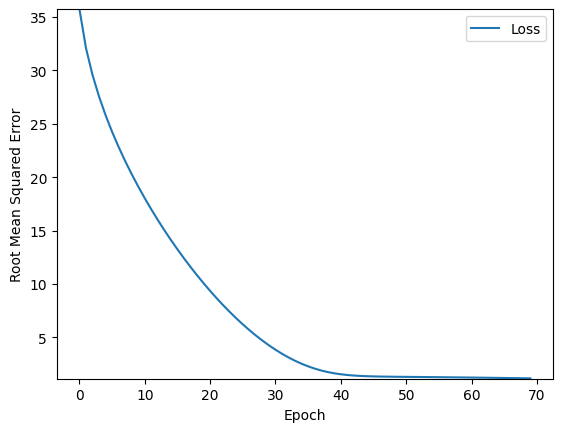

In [11]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [12]:
## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

SyntaxError: ignored

Epoch 1/100
12/12 [==============================] - 1s 6ms/step - loss: 422.5588 - root_mean_squared_error: 20.5562
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 253.2849 - root_mean_squared_error: 15.9149
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 157.1351 - root_mean_squared_error: 12.5354
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 90.6608 - root_mean_squared_error: 9.5216
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 45.9489 - root_mean_squared_error: 6.7786
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 18.7319 - root_mean_squared_error: 4.3280
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 5.4882 - root_mean_squared_error: 2.3427
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7997 - root_mean_squared_error: 1.3415
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 1.3

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


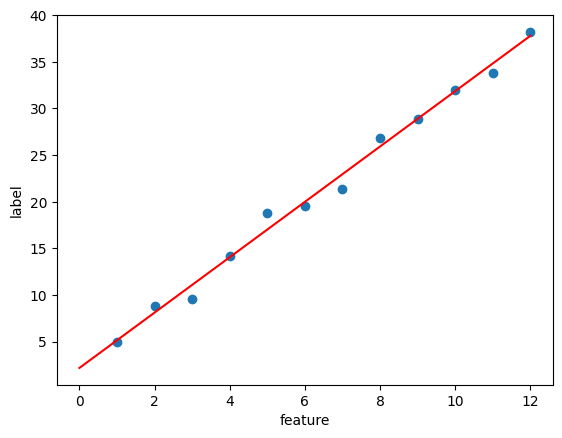

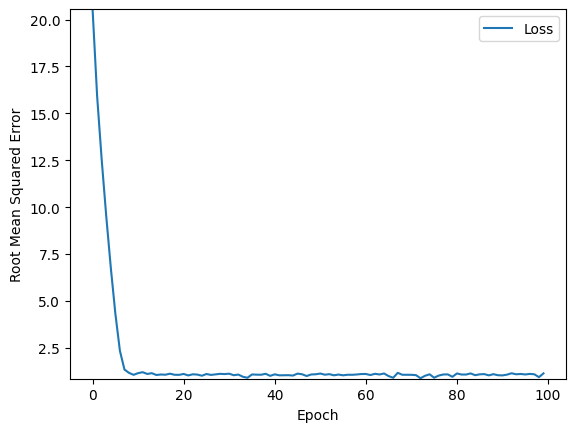

In [13]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=100
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.

## Ringkasan penyetelan hyperparameter

Sebagian besar masalah pembelajaran mesin memerlukan banyak penyesuaian hyperparameter. Sayangnya, kami tidak dapat memberikan aturan penyetelan yang konkrit untuk setiap model. Menurunkan kecepatan pemelajaran dapat membantu satu model melakukan konvergensi secara efisien namun membuat model lain melakukan konvergensi menjadi terlalu lambat. Anda harus bereksperimen untuk menemukan kumpulan hyperparameter terbaik untuk kumpulan data Anda. Meskipun demikian, berikut beberapa aturan praktisnya:

  * Training loss harus terus menurun, awalnya tajam, dan kemudian lebih lambat hingga kemiringan kurva mencapai atau mendekati nol.
  * Jika kerugian pelatihan tidak menyatu, latihlah untuk beberapa waktu lagi.
  * Jika kerugian pelatihan berkurang terlalu lambat, tingkatkan kecepatan pembelajaran. Perhatikan bahwa menyetel kecepatan pemelajaran terlalu tinggi juga dapat mencegah konvergensi hilangnya pelatihan.
  * Jika kerugian pelatihan sangat bervariasi (yaitu, kerugian pelatihan melonjak), turunkan kecepatan pemelajaran.
  * Menurunkan kecepatan pemelajaran sekaligus meningkatkan jumlah periode atau ukuran batch sering kali merupakan kombinasi yang baik.
  * Menyetel ukuran batch ke nomor batch yang *sangat* kecil juga dapat menyebabkan ketidakstabilan. Pertama, coba nilai ukuran batch yang besar. Kemudian, kurangi ukuran batch hingga Anda melihat penurunan.
  * Untuk kumpulan data dunia nyata yang terdiri dari sejumlah besar contoh, keseluruhan kumpulan data mungkin tidak dapat dimasukkan ke dalam memori. Dalam kasus seperti itu, Anda harus mengurangi ukuran batch agar batch dapat masuk ke dalam memori.

Ingat: kombinasi hyperparameter yang ideal bergantung pada data, jadi Anda harus selalu bereksperimen dan memverifikasi.